# Setup

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams["figure.dpi"] = 100
import seaborn as sns

sns.set()
from tqdm import tqdm
from IPython.display import Image

# UB Buildings

<Axes: >

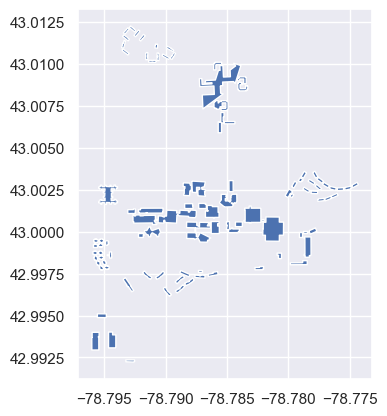

In [2]:
ub_buildings = gpd.read_file("../data/raw/ub/UB_bld.shp")
ub_buildings.drop("Id", axis=1, inplace=True)
ub_buildings.index.name = "unique_id"
ub_buildings.head()
ub_buildings.plot()

In [3]:
ub_buildings.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [4]:
ub_buildings.shape

(95, 1)

# GMU World

<Axes: >

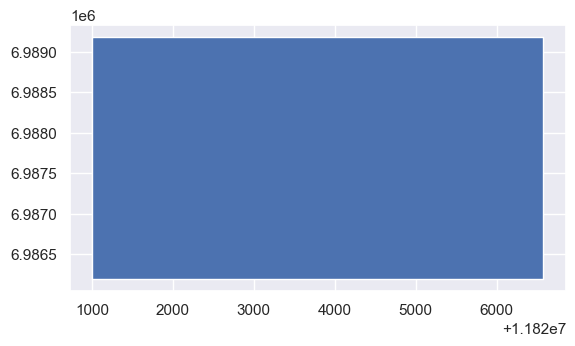

In [13]:
world = (
    gpd.read_file("../data/raw/gmu/world.shp")
    .set_index("Id")
    .set_crs("epsg:2283", allow_override=True)
)
world.centroid.iloc[0].y
world.plot()

In [6]:
world.crs

<Projected CRS: EPSG:2283>
Name: NAD83 / Virginia North (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - Virginia - counties of Arlington; Augusta; Bath; Caroline; Clarke; Culpeper; Fairfax; Fauquier; Frederick; Greene; Highland; King George; Loudoun; Madison; Orange; Page; Prince William; Rappahannock; Rockingham; Shenandoah; Spotsylvania; Stafford; Warren; Westmoreland.
- bounds: (-80.06, 37.77, -76.51, 39.46)
Coordinate Operation:
- name: SPCS83 Virginia North zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

<Axes: >

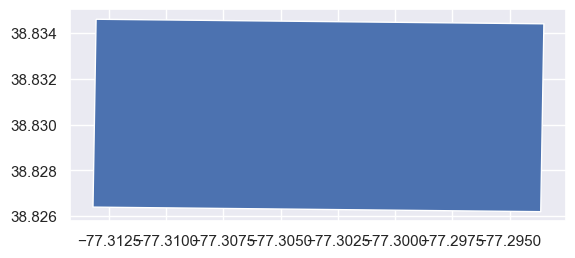

In [14]:
from shapely.ops import transform
import pyproj

projector = pyproj.Transformer.from_crs(
    pyproj.CRS("epsg:2283"), pyproj.CRS("epsg:4269"), always_xy=True
).transform

new_world = gpd.GeoSeries(transform(projector, world.iloc[0].geometry))
new_world
new_world.plot()

# GMU Buildings

<Axes: >

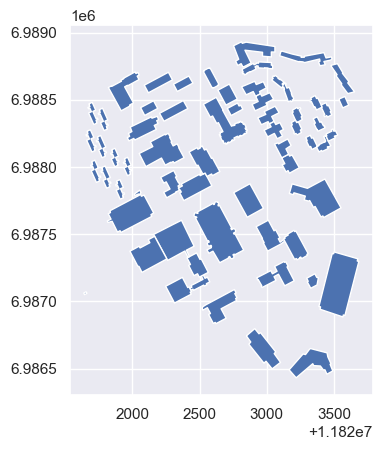

In [15]:
gmu_buildings = (
    gpd.read_file("../data/raw/gmu/Mason_bld.shp")
    .fillna(0.0)
    .set_index("Id")
    .rename(columns={"NAME": "name"})
    .set_crs("epsg:2283", allow_override=True)
)
gmu_buildings.head()
gmu_buildings.plot()

In [9]:
gmu_buildings["function"].value_counts()

0.0    22
2.0    22
1.0    17
Name: function, dtype: int64

In [10]:
gmu_buildings["centroid"] = [
    (x, y) for x, y in zip(gmu_buildings.centroid.x, gmu_buildings.centroid.y)
]

In [11]:
gmu_buildings.head()

,name,function,geometry,centroid
Id,,,,
1,GEORGE W. JOHNSON CENTER,1.0,"POLYGON ((11822517.112 6987684.108, 11822557.0...","(11822640.598755237, 6987512.569608039)"
2,DAVID KING HALL,1.0,"POLYGON ((11822800.554 6987724.175, 11822753.8...","(11822864.483255226, 6987750.865497605)"
3,SCIENCE AND TECH I,1.0,"POLYGON ((11823106.160 6987428.086, 11823006.5...","(11823017.541769873, 6987488.482499858)"
4,SCIENCE AND TECH II,1.0,"POLYGON ((11823144.777 6987485.867, 11823154.0...","(11823215.098050594, 6987415.048930175)"
5,ENTERPRISE HALL,1.0,"POLYGON ((11822946.564 6987144.449, 11822939.8...","(11823075.806553971, 6987192.066489626)"


# GMU Walkway

In [16]:
gmu_walkway = (
    gpd.read_file("../data/raw/gmu/Mason_walkway_line.shp")
    .set_index("Id")
    .set_crs("epsg:2283", allow_override=True)
)
gmu_walkway.head()

KeyError: "None of ['Id'] are in the columns"

In [ ]:
from shapely.geometry import Point
import uuid

vertex_set = set()
for _, row in gmu_walkway.iterrows():
    for point in row["geometry"].coords:
        vertex_set.add(point)

vertex_dict = {uuid.uuid4().int: Point(p) for p in vertex_set}
vertex_dict

{68521298494005431610099005839000641692: <shapely.geometry.point.Point at 0x133b325e0>,
 114977171133013388040640788163878471647: <shapely.geometry.point.Point at 0x133b32550>,
 93384252496158821788267493763013387155: <shapely.geometry.point.Point at 0x133b386d0>,
 211663041745499451270103285047216845138: <shapely.geometry.point.Point at 0x133b381f0>,
 135270885614411274206368168019461008332: <shapely.geometry.point.Point at 0x133b38790>,
 326808753280942427483495287200121420107: <shapely.geometry.point.Point at 0x133b38400>,
 34235816650196005609865422897083110251: <shapely.geometry.point.Point at 0x133b38160>,
 110438462521765114570418240528656529740: <shapely.geometry.point.Point at 0x133b380d0>,
 277453342244296833196473955256488051367: <shapely.geometry.point.Point at 0x133b38700>,
 80059809902571808643483975567199831559: <shapely.geometry.point.Point at 0x133b4da00>,
 167780713237187054386952033257161165592: <shapely.geometry.point.Point at 0x133b4de80>,
 378744697510797669486960

In [ ]:
vertex_df = (
    gpd.GeoDataFrame.from_dict(vertex_dict, orient="index")
    .rename(columns={0: "geometry"})
    .set_crs("epsg:2283")
)
vertex_df.head()

,geometry
68521298494005431610099005839000641692,POINT (11823573.236 6988812.749)
114977171133013388040640788163878471647,POINT (11822603.538 6987915.808)
93384252496158821788267493763013387155,POINT (11822975.586 6987109.325)
211663041745499451270103285047216845138,POINT (11822182.773 6986986.969)
135270885614411274206368168019461008332,POINT (11822451.046 6988641.197)


In [ ]:
vertex_df.iloc[0]

geometry    POINT (11823573.236 6988812.749)
Name: 68521298494005431610099005839000641692, dtype: geometry

In [ ]:
Point(1.0, 2.0).coords[0]

(1.0, 2.0)

# GMU Lakes and Rivers

<Axes: >

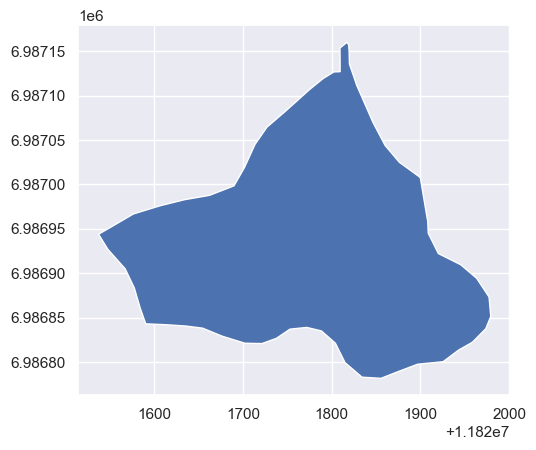

In [17]:
gmu_lakes = gpd.read_file("../data/raw/gmu/hydrop.shp").set_crs(
    "epsg:2283", allow_override=True
)
gmu_lakes.index.names = ["Id"]
gmu_lakes
gmu_lakes.plot()

<Axes: >

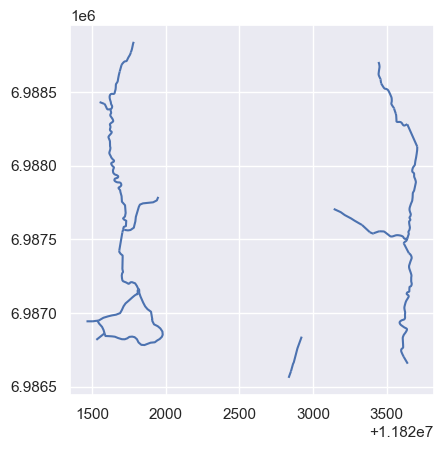

In [18]:
gmu_rivers = gpd.read_file("../data/raw/gmu/hydrol.shp").set_crs(
    "epsg:2283", allow_override=True
)
gmu_rivers.index.names = ["Id"]
gmu_rivers
gmu_rivers.plot()

# GMU Driveway

<Axes: >

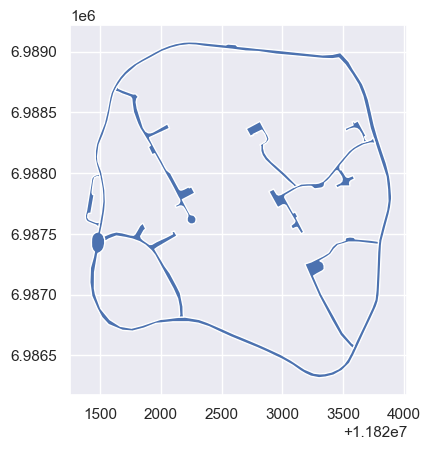

In [19]:
gmu_driveway = (
    gpd.read_file("../data/raw/gmu/Mason_Rds.shp")
    .set_index("Id")
    .rename(columns={"NAME": "name"})
    .set_crs("epsg:2283", allow_override=True)
)
gmu_driveway.head()
gmu_driveway.plot()